In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = pd.read_csv('solar_system.csv')

print(data.shape)
#rows is first number, cols 2nd number (20 rows, 11 cols)

print(data.head())
print(data.tail())

print(data.columns)
print(data.index)

(20, 11)
                Attribute Mercury  Venus  Earth   Moon   Mars Jupiter  Saturn  \
0          Mass (10^24kg)   0.330   4.87   5.97  0.073  0.642    1898     568   
1           Diameter (km)    4879  12104  12756   3475   6792  142984  120536   
2        Density (kg/m^3)    5429   5243   5514   3340   3934    1326     687   
3         Gravity (m/s^2)     3.7    8.9    9.8    1.6    3.7    23.1     9.0   
4  Escape Velocity (km/s)     4.3   10.4   11.2    2.4    5.0    59.5    35.5   

  Uranus Neptune   Pluto  
0   86.8     102  0.0130  
1  51118   49528    2376  
2   1270    1638    1850  
3    8.7    11.0     0.7  
4   21.3    23.5     1.3  
                  Attribute Mercury Venus Earth Moon  Mars  Jupiter   Saturn  \
15     Mean Temperature (C)     167   464    15  -20   -65     -110     -140   
16  Surface Pressure (bars)       0    92     1    0  0.01  Unknown  Unknown   
17          Number of Moons       0     0     1    0     2       95      274   
18             Ring Sy

In [25]:
orbital_period = data.iloc[10]
perihelion = data.iloc[8]
aphelion = data.iloc[9]

#perihelion - point closest to the Sun
#aphelion - point on orbit farthest from Sun
# Semi-major axis - half of the longest diameter of an oval orbit

print(perihelion)
print(aphelion)

Attribute    Perihelion (10^6 km)
Mercury                      46.0
Venus                       107.5
Earth                       147.1
Moon                        0.363
Mars                        206.7
Jupiter                     740.6
Saturn                     1357.6
Uranus                     2732.7
Neptune                    4471.1
Pluto                      4436.8
Name: 8, dtype: object
Attribute    Aphelion (10^6 km)
Mercury                    69.8
Venus                     108.9
Earth                     152.1
Moon                      0.406
Mars                      249.3
Jupiter                   816.4
Saturn                   1506.5
Uranus                   3001.4
Neptune                  4558.9
Pluto                    7375.9
Name: 9, dtype: object


In [27]:
peri = pd.to_numeric(perihelion.drop("Attribute"))
aphe = pd.to_numeric(aphelion.drop("Attribute"))

semi_major_axis = (peri + aphe) / 2
semi_major_axis.name = "Semi-major axis (10^6 km)"

print(semi_major_axis)

Mercury      57.9000
Venus       108.2000
Earth       149.6000
Moon          0.3845
Mars        228.0000
Jupiter     778.5000
Saturn     1432.0500
Uranus     2867.0500
Neptune    4515.0000
Pluto      5906.3500
Name: Semi-major axis (10^6 km), dtype: float64


In [38]:
data.loc[20, "Attribute"] = "Semi-major axis (10^6 km)"
for planet in semi_major_axis.index:
    data.loc[20, planet] = semi_major_axis[planet]

print(data) #not sure why it shows up twice

                      Attribute Mercury    Venus  Earth    Moon   Mars  \
0                Mass (10^24kg)   0.330     4.87   5.97   0.073  0.642   
1                 Diameter (km)    4879    12104  12756    3475   6792   
2              Density (kg/m^3)    5429     5243   5514    3340   3934   
3               Gravity (m/s^2)     3.7      8.9    9.8     1.6    3.7   
4        Escape Velocity (km/s)     4.3     10.4   11.2     2.4    5.0   
5       Rotation Period (hours)  1407.6  -5832.5   23.9   655.7   24.6   
6         Length of Day (hours)  4222.6   2802.0   24.0   708.7   24.7   
7   Distance from Sun (10^6 km)    57.9    108.2  149.6   0.384  228.0   
8          Perihelion (10^6 km)    46.0    107.5  147.1   0.363  206.7   
9            Aphelion (10^6 km)    69.8    108.9  152.1   0.406  249.3   
10        Orbital Period (days)    88.0    224.7  365.2    27.3  687.0   
11      Orbital Velocity (km/s)    47.4     35.0   29.8     1.0   24.1   
12    Orbital Inclination (deg)     7.

In [39]:
print(data.shape)
#22 rows, 11 cols (one is a duplicate though, should be 21)


(22, 11)


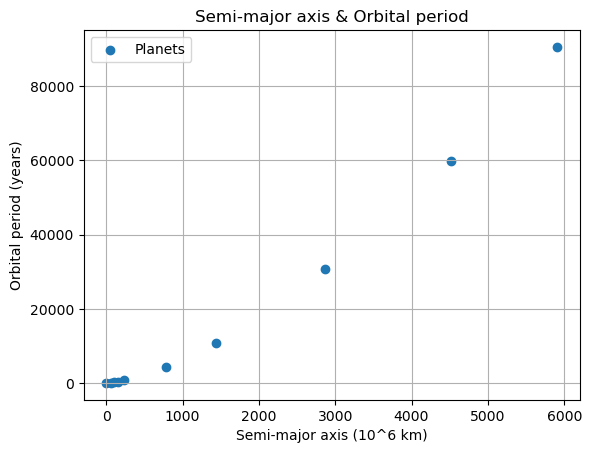

In [48]:
a = pd.to_numeric(semi_major_axis)

orbital_row = data[data["Attribute"].str.contains("Orbital period", case=False, na=False)].iloc[0]
orbital_period = pd.to_numeric(orbital_row[a.index])

plt.scatter(a, orbital_period, label="Planets")

plt.xlabel("Semi-major axis (10^6 km)")          # adjust if different
plt.ylabel("Orbital period (years)")            # adjust if different
plt.title("Semi-major axis & Orbital period")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
def keplers_third_law(a, m):
    return m * a ** 1.5

a_vals = a.values
P_vals = orbital_period.values

popt, pcov = curve_fit(keplers_third_law, a_vals, P_vals)

m_fit = popt[0]

print(f"Best-fit parameter m = {m_fit:.2f}")
print(f"Fitted model: P(a) = {m_fit:.2f} * a^(3/2)")

Best-fit parameter m = 0.20
Fitted model: P(a) = 0.20 * a^(3/2)


In [54]:
P_model = keplers_third_law(a_vals, m_fit)
residuals = P_vals - P_model

chi = np.sum(residuals**2)

dof = len(a_vals) - 1
chi_red = chi / dof

print(f"Reduced chi-squared: {chi_red:.2f}")

Reduced chi-squared: 41276.71


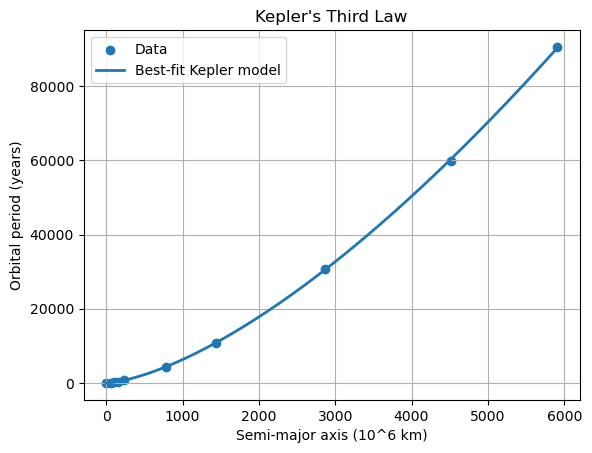

In [57]:
a_fit = np.linspace(a_vals.min(), a_vals.max(), 500)
P_fit = keplers_third_law(a_fit, m_fit)

plt.scatter(a_vals, P_vals, label="Data", marker="o")
plt.plot(a_fit, P_fit, label="Best-fit Kepler model", linewidth=2)

plt.xlabel("Semi-major axis (10^6 km)")
plt.ylabel("Orbital period (years)")
plt.title("Kepler's Third Law")
plt.legend()
plt.grid(True)
plt.show()